In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Import Datasets from CSV files
day = pd.read_csv('./day.csv', usecols=['Day', 'Tips', 'Cash Amount', 'Sales'])
night = pd.read_csv('./night.csv', usecols=['Day', 'Tips', 'Cash Amount', 'Sales'])
double = pd.read_csv('./double.csv', usecols=['Day', 'Tips', 'Cash Amount', 'Sales'])

In [3]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
Day            47 non-null object
Tips           47 non-null float64
Cash Amount    47 non-null float64
Sales          47 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.5+ KB


In [4]:
night.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
Day            72 non-null object
Tips           72 non-null float64
Cash Amount    72 non-null float64
Sales          72 non-null float64
dtypes: float64(3), object(1)
memory usage: 2.3+ KB


In [5]:
double.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
Day            45 non-null object
Tips           45 non-null float64
Cash Amount    45 non-null float64
Sales          45 non-null float64
dtypes: float64(3), object(1)
memory usage: 1.5+ KB


In [6]:
data = day.append(night).append(double)

In [7]:
## Check Correlation between Tips and Sales
data[['Tips','Sales']].corr()

,Tips,Sales
Tips,1.00000,0.94558
Sales,0.94558,1.00000


In [8]:
## Summary of linear regression between Tips and Sales
import statsmodels.formula.api as sm
regression_OLS = sm.OLS(endog = data.Sales, exog = np.append(np.ones((len(data.Tips), 1)), data.Tips.values.reshape(len(data.Tips), 1), axis = 1)).fit()
regression_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     1368.
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           6.76e-81
Time:                        01:08:57   Log-Likelihood:                -999.95
No. Observations:                 164   AIC:                             2004.
Df Residuals:                     162   BIC:                             2010.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.6219     18.957      0.613      0.541     -25.814      49.057
x1             6.8688      0.186     36.987      0.000       6.502       7.236
==============================================================================
Omnibus:                       66.456   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              288.299
Skew:                           1.466   Prob(JB):                     2.49e-63
Kurtosis:                       8.796   Cond. No.                         229.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Relationship between Tips Earned and Sales')

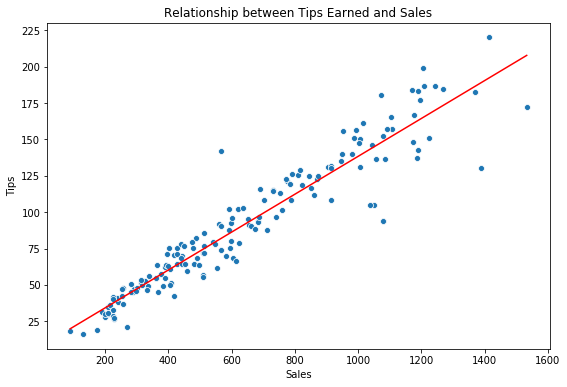

In [9]:
## Visualizing the Linear Regression Plot
mb = np.polyfit(data['Sales'], data['Tips'], deg=1)
x = np.append(data['Sales'].values.reshape(-1,1), np.ones(np.shape(data['Sales'].values.reshape(-1,1))), axis=1)
y_pred = np.dot(x, mb)
plt.figure(figsize=(9,6))
sns.scatterplot(x='Sales', y='Tips', data=data)
sns.lineplot(x='Sales', y=y_pred, data=data, color='r')
plt.xlabel('Sales')
plt.ylabel('Tips')
plt.title('Relationship between Tips Earned and Sales')

In [10]:
## Accounting for Tip Out and getting the actual Amount of Tips
day['Net'] = round(day.Tips - (day.Sales * 0.06) + (day['Cash Amount'] * (np.random.randint(10,19) / 100)), 2)
night['Net'] = round(night.Tips - (night.Sales * 0.06) + (night['Cash Amount'] * (np.random.randint(10,19) / 100)), 2)
## Categorizing between Day Shift and Night Shift
day['Shift'] = 'Day'
night['Shift'] = 'Night'

In [11]:
day.head()

,Day,Tips,Cash Amount,Sales,Net,Shift
0,Monday,64.36,0.0,481.58,35.47,Day
1,Tuesday,70.03,0.0,443.87,43.40,Day
2,Tuesday,54.63,0.0,361.90,32.92,Day
3,Tuesday,82.16,0.0,487.27,52.92,Day
4,Thursday,35.00,0.0,207.87,22.53,Day


In [12]:
night.head()

,Day,Tips,Cash Amount,Sales,Net,Shift
0,Wednesday,75.10,0.00,478.64,46.38,Night
1,Friday,118.66,124.72,822.18,85.54,Night
2,Thursday,186.70,160.72,1208.82,135.06,Night
3,Friday,150.66,175.92,1223.53,100.12,Night
4,Sunday,18.87,0.00,173.48,8.46,Night


In [13]:
## Dictionary for Mapping Day of Week to Numerical Value
sort_days = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

In [14]:
## Map Day to Numerical
day['NumDay'] = day.Day.map(sort_days)
night['NumDay'] = night.Day.map(sort_days)

In [15]:
## Sort Dataset by Day of Week
day.sort_values('NumDay', inplace=True)
night.sort_values('NumDay', inplace=True)

In [16]:
day.head()

,Day,Tips,Cash Amount,Sales,Net,Shift,NumDay
0,Monday,64.36,0.00,481.58,35.47,Day,0
41,Monday,47.95,0.00,255.76,32.60,Day,0
39,Monday,54.50,24.75,359.83,36.38,Day,0
5,Monday,75.10,0.00,427.29,49.46,Day,0
29,Monday,71.02,0.00,394.82,47.33,Day,0


In [17]:
night.head()

,Day,Tips,Cash Amount,Sales,Net,Shift,NumDay
69,Monday,131.33,255.43,1006.67,104.14,Night,0
64,Monday,183.84,11.92,1170.23,115.18,Night,0
60,Monday,61.55,100.44,552.73,41.44,Night,0
14,Monday,18.04,0.00,89.79,12.65,Night,0
22,Monday,26.42,0.00,226.99,12.80,Night,0


In [18]:
day.describe()

,Tips,Cash Amount,Sales,Net,NumDay
count,47.000000,47.000000,47.000000,47.000000,47.00000
mean,55.152766,11.307234,350.558723,35.701915,2.00000
std,18.151958,24.015196,121.236852,12.051746,1.44463
min,27.980000,0.000000,191.170000,15.980000,0.00000
25%,43.575000,0.000000,255.095000,28.130000,1.00000
50%,50.980000,0.000000,334.670000,33.840000,2.00000
75%,64.425000,0.000000,413.995000,43.775000,3.00000
max,113.090000,108.140000,752.990000,73.400000,6.00000


In [19]:
night.describe()

,Tips,Cash Amount,Sales,Net,NumDay
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,93.065139,77.730556,692.187083,61.638194,3.638889
std,44.167848,82.808944,326.033694,31.970914,1.915876
min,16.290000,0.000000,89.790000,4.950000,0.000000
25%,64.125000,0.000000,470.102500,41.680000,2.000000
50%,90.845000,56.600000,617.570000,56.725000,4.000000
75%,125.812500,115.797500,961.060000,83.845000,5.000000
max,186.700000,301.200000,1388.620000,138.780000,6.000000


In [20]:
day.Sales.quantile(0.05)

208.58700000000002

In [21]:
day.Sales.quantile(0.95)

531.935

In [22]:
night.Sales.quantile(0.05)

206.625

In [23]:
night.Sales.quantile(0.95)

1198.942

In [24]:
## Removing Outliers
d = day[(day.Sales > day.Sales.quantile(0.05)) & (day.Sales < day.Sales.quantile(0.95))].Sales.mean()
d

338.55292682926824

In [25]:
## Removing Outliers
n = night[(night.Sales > night.Sales.quantile(0.05)) & (night.Sales < night.Sales.quantile(0.95))].Sales.mean()
n

688.3107812500002

In [26]:
## Ratio of Average Tips Earned during Night vs Day
ratio = n/d
ratio

2.0330965314534537

In [27]:
## Night-Day Multiple
multiple = n / (n+d)
multiple

0.6703039320938453

In [28]:
## Copying Double Dataset
double_day = double.copy(deep=True)
double_night = double.copy(deep=True)

In [29]:
## Extrapolating for the Night shifts in the Doubles dataset
double_night.Tips = double.Tips * multiple
double_night.Sales = double.Sales * multiple
double_night['Cash Amount'] = double['Cash Amount'] * multiple

In [30]:
## Extrapolating for the Day shifts in the Doubles Dataset
double_day.Tips = double.Tips - double_night.Tips
double_day.Sales = double.Sales - double_night.Sales
double_day['Cash Amount'] = double['Cash Amount'] - double_night['Cash Amount']

In [31]:
## Map and Sort by Day
double_day['NumDay'] = double_day.Day.map(sort_days)
double_day.sort_values('NumDay', inplace=True)
double_night['NumDay'] = double_night.Day.map(sort_days)
double_night.sort_values('NumDay', inplace=True)

In [32]:
## Account for Tip Outs
double_day['Net'] = round(double_day.Tips - (double_day.Sales * 0.06) + (double_day['Cash Amount'] * (np.random.randint(10,19) / 100)), 2)
double_night['Net'] = round(double_night.Tips - (double_night.Sales * 0.06) + (double_night['Cash Amount'] * (np.random.randint(10,19) / 100)), 2)
double_day['Shift'] = 'Day'
double_night['Shift'] = 'Night'

In [33]:
## Append Extrapolated Data into our Datasets
day = day.append(double_day, sort=True)
night = night.append(double_night, sort=True)

In [34]:
## Consolidate into 1 dataset
df = day.append(night)
## Create New column for Net Tip Percentage
df['Yield'] = df.Net / df.Sales

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 0 to 42
Data columns (total 8 columns):
Cash Amount    209 non-null float64
Day            209 non-null object
Net            209 non-null float64
NumDay         209 non-null int64
Sales          209 non-null float64
Shift          209 non-null object
Tips           209 non-null float64
Yield          209 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 14.7+ KB


In [36]:
df.describe()

,Cash Amount,Net,NumDay,Sales,Tips,Yield
count,209.000000,209.000000,209.000000,209.00000,209.000000,209.000000
mean,42.468182,47.237799,2.669856,501.60134,71.698278,0.095899
std,60.818055,25.982728,1.821638,279.50081,37.079030,0.018622
min,0.000000,4.950000,0.000000,89.79000,16.290000,0.018474
25%,0.000000,28.400000,1.000000,288.67000,45.000000,0.088297
50%,18.403635,41.820000,3.000000,426.68000,64.127977,0.098326
75%,61.060000,60.020000,4.000000,651.25000,92.620000,0.104115
max,301.200000,138.780000,6.000000,1388.62000,186.700000,0.189732


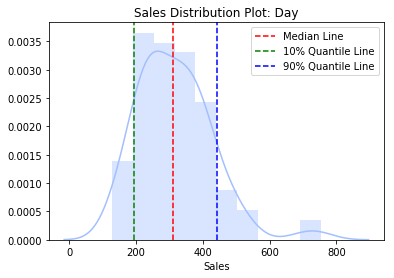

In [37]:
sns.distplot(day.Sales, color=sns.xkcd_rgb["pastel blue"])
plt.axvline(day.Sales.median(), color='r', linestyle='dashed', label='Median Line')
plt.axvline(day.Sales.quantile(0.1), color='g', linestyle='dashed', label='10% Quantile Line')
plt.axvline(day.Sales.quantile(0.9), color='b', linestyle='dashed', label='90% Quantile Line')
plt.title('Sales Distribution Plot: Day')
plt.legend()

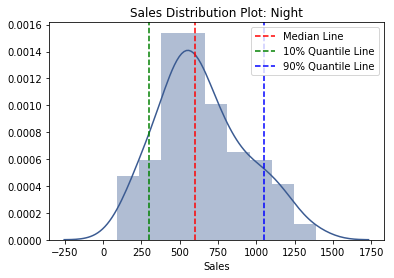

In [38]:
sns.distplot(night.Sales, color=sns.xkcd_rgb["denim blue"])
plt.axvline(night.Sales.median(), color='r', linestyle='dashed', label='Median Line')
plt.axvline(night.Sales.quantile(0.1), color='g', linestyle='dashed', label='10% Quantile Line')
plt.axvline(night.Sales.quantile(0.9), color='b', linestyle='dashed', label='90% Quantile Line')
plt.title('Sales Distribution Plot: Night')
plt.legend()

In [39]:
plot_data = df.groupby(['Day', 'Shift']).agg({'Tips':'count', 'Sales':'mean', 'NumDay':'mean', 'Net':'mean', 'Yield':'mean'}).sort_values('NumDay').reset_index()

Text(0.5, 1.0, 'Frequency Chart: Days Worked')

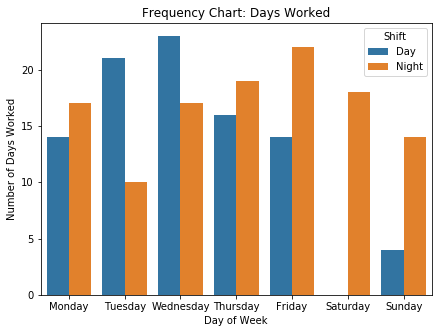

In [40]:
plt.figure(figsize=(7,5))
sns.barplot(x='Day', y='Tips',hue='Shift',data=plot_data, ci=None)
plt.xlabel('Day of Week')
plt.ylabel('Number of Days Worked')
plt.title('Frequency Chart: Days Worked')

In [41]:
## Transform and Pivot Dataset
tips_pivoted = pd.pivot_table(plot_data, index=['Shift'], columns=['NumDay', 'Day'], values=['Net'])
tips_pivoted.sort_index(ascending=False, inplace=True)
tips_pivoted.fillna(tips_pivoted.iloc[1,-1], inplace=True)
tips_pivoted

Net                                                         \
NumDay          0          1          2          3          4          5   
Day        Monday    Tuesday  Wednesday   Thursday     Friday   Saturday   
Shift                                                                      
Night   56.465294  51.624000  53.263529  65.134737  55.927727  77.463333   
Day     33.505714  32.400952  30.351739  27.896875  28.879286  48.507500   

                   
NumDay          6  
Day        Sunday  
Shift              
Night   52.605714  
Day     48.507500

In [42]:
## Transform and Pivot Dataset
sales_pivoted = pd.pivot_table(plot_data, index=['Shift'], columns=['NumDay', 'Day'], values=['Sales'])
sales_pivoted.sort_index(ascending=False, inplace=True)
sales_pivoted.fillna(sales_pivoted.iloc[1,-1], inplace=True)
sales_pivoted

Sales                                                  \
NumDay           0           1           2           3           4   
Day         Monday     Tuesday   Wednesday    Thursday      Friday   
Shift                                                                
Night   583.822406  536.178588  525.884340  665.612229  647.310182   
Day     339.872793  315.174006  299.882444  275.713602  316.780428   

                                
NumDay           5           6  
Day       Saturday      Sunday  
Shift                           
Night   808.055000  714.211953  
Day     513.988165  513.988165

In [43]:
yield_pivoted = pd.pivot_table(plot_data, index=['Shift'], columns=['NumDay', 'Day'], values=['Yield'])
yield_pivoted.sort_index(ascending=False, inplace=True)
yield_pivoted.fillna(yield_pivoted.iloc[1,-1], inplace=True)
yield_pivoted

Yield                                                            
NumDay         0         1         2         3         4         5         6
Day       Monday   Tuesday Wednesday  Thursday    Friday  Saturday    Sunday
Shift                                                                       
Night   0.099870  0.096768  0.098656  0.097628  0.087668  0.094314  0.073843
Day     0.103302  0.102981  0.101290  0.099687  0.091488  0.092707  0.092707

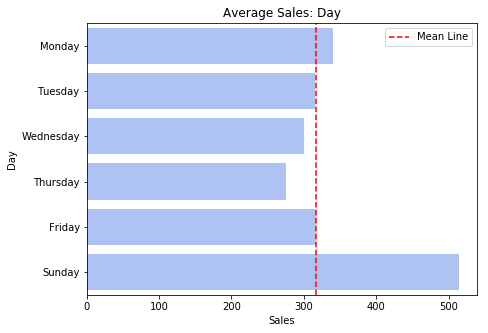

In [44]:
plt.figure(figsize=(7,5))
sns.barplot(x='Sales', y='Day', data=df[df['Shift']=='Day'], ci=None, color=sns.xkcd_rgb["pastel blue"])
plt.axvline(day.Sales.mean(), color='r', linestyle='dashed', label='Mean Line')
plt.title('Average Sales: Day')
plt.legend()

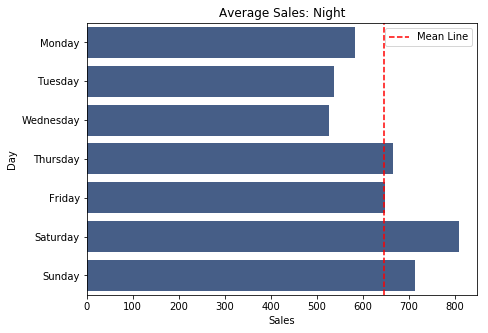

In [45]:
plt.figure(figsize=(7,5))
sns.barplot(x='Sales', y='Day', data=df[df['Shift']=='Night'], ci=None, color=sns.xkcd_rgb["denim blue"])
plt.axvline(night.Sales.mean(), color='r', linestyle='dashed', label='Mean Line')
plt.title('Average Sales: Night')
plt.legend()

[Text(60.0, 0.5, 'Shift'),
 Text(0.5, 33.0, 'Day of the Week'),
 Text(0.5, 1.0, 'Average Sales by Day & Week')]

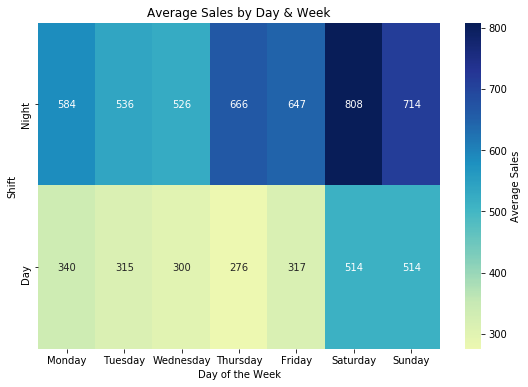

In [46]:
# Visualizing our Average tips earned by Day of the Week and Shift using Seaborn
plt.figure(figsize=(9,6))
ax = sns.heatmap(sales_pivoted, annot=True, cmap='YlGnBu', fmt='.3g', center=plot_data.Sales.mean(), xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], cbar_kws={'label': 'Average Sales'})
ax.set(xlabel='Day of the Week', ylabel='Shift', title='Average Sales by Day & Week')

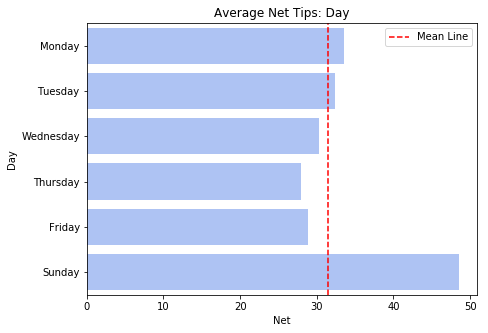

In [47]:
plt.figure(figsize=(7,5))
sns.barplot(x='Net', y='Day', data=df[df['Shift']=='Day'], ci=None, color=sns.xkcd_rgb["pastel blue"])
plt.axvline(day.Net.mean(), color='r', linestyle='dashed', label='Mean Line')
plt.title('Average Net Tips: Day')
plt.legend()

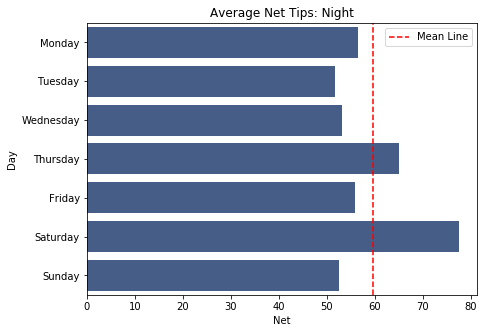

In [48]:
plt.figure(figsize=(7,5))
sns.barplot(x='Net', y='Day', data=df[df['Shift']=='Night'], ci=None, color=sns.xkcd_rgb["denim blue"])
plt.axvline(night.Net.mean(), color='r', linestyle='dashed', label='Mean Line')
plt.title('Average Net Tips: Night')
plt.legend()

[Text(60.0, 0.5, 'Shift'),
 Text(0.5, 33.0, 'Day of the Week'),
 Text(0.5, 1.0, 'Average Net Tips by Day & Shift')]

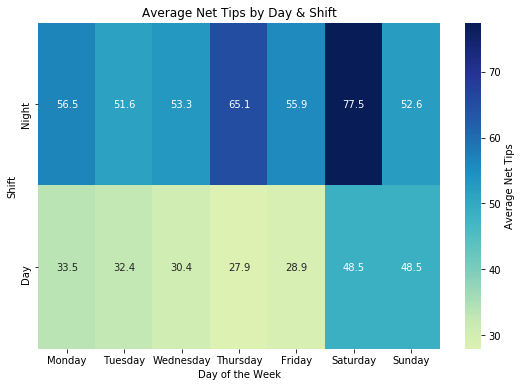

In [49]:
# Visualizing our Average tips earned by Day of the Week and Shift using Seaborn
plt.figure(figsize=(9,6))
ax = sns.heatmap(tips_pivoted, annot=True, cmap='YlGnBu', fmt='.3g', center=plot_data.Net.mean(), xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], cbar_kws={'label': 'Average Net Tips'})
ax.set(xlabel='Day of the Week', ylabel='Shift', title='Average Net Tips by Day & Shift')

[Text(60.0, 0.5, 'Shift'),
 Text(0.5, 33.0, 'Day of the Week'),
 Text(0.5, 1.0, 'Average Yield by Day & Shift')]

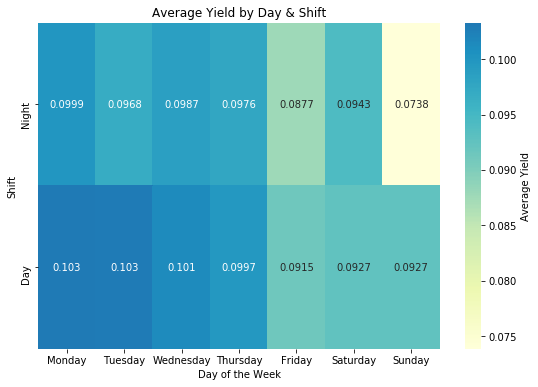

In [50]:
# Visualizing our Average tips earned by Day of the Week and Shift using Seaborn
plt.figure(figsize=(9,6))
ax = sns.heatmap(yield_pivoted, annot=True, cmap='YlGnBu', fmt='.3g', center=plot_data.Yield.mean(), xticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], cbar_kws={'label': 'Average Yield'})
ax.set(xlabel='Day of the Week', ylabel='Shift', title='Average Yield by Day & Shift')